In [1]:
from transformers import pipeline

import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np

/Users/tonywang/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
df = pd.read_csv("tweets.csv")
df.set_index("Id", inplace = True)
df.head()

,Text,screenName,retweeted
Id,,,
1,RT @mrvelstan: literally nobody:\nme:\n\n#Aven...,DavidAc96,637
2,"RT @agntecarter: i’m emotional, sorry!!\n\n201...",NRmalaa,302
3,saving these bingo cards for tomorrow \n©\n #A...,jijitsuu,0
4,RT @HelloBoon: Man these #AvengersEndgame ads ...,SahapunB,23781
5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",stella22_97,13067


In [3]:
# Sentiment analysis 

sentiment_analysis = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

print(sentiment_analysis(df.loc[df.index[0], "Text"]))

/Users/tonywang/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


[{'label': 'NEGATIVE', 'score': 0.9994387030601501}]


In [4]:
negative_sentiments = []
positive_sentiments = [] 

sentiment = sentiment_analysis(df.loc[:, "Text"].tolist())

for output, retweets in zip(sentiment, df.loc[:, 'retweeted'].tolist()):
    if output['label'] == 'POSITIVE': 
        positive_sentiments.append(retweets)
    else: 
        negative_sentiments.append(retweets)
        
print(positive_sentiments)

[13067, 3122, 349]


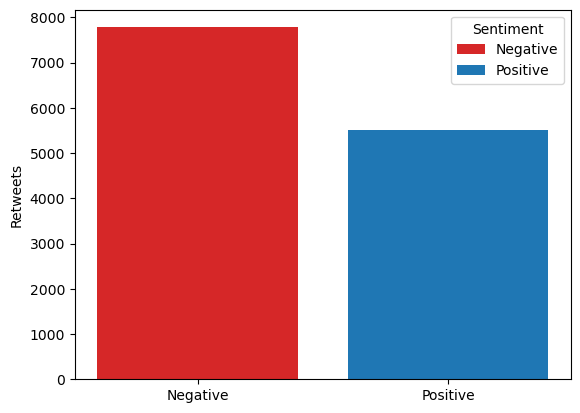

In [5]:
fig, ax = plt.subplots()

labels = ["Negative", "Positive"]
averages = [np.average(negative_sentiments), np.average(positive_sentiments)]

bar_labels = ["Negative", "Positive"]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(labels, averages, label = bar_labels, color = bar_colors)

ax.set_ylabel('Retweets')
ax.legend(title = 'Sentiment')

plt.show()

In [9]:
# Category Analysis 

category_analysis = pipeline("zero-shot-classification")

labels = {"advertisement": [], "critic": [], "reaction": []}

categories = category_analysis(df.loc[:, "Text"].tolist(), candidate_labels = list(labels.keys()))

for output, retweets in zip(categories, df.loc[:, 'retweeted'].tolist()):
    
    for i in range(3): 
        labels[output['labels'][i]].append(output['scores'][i] * retweets)
        
print(labels)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'advertisement': [12.848306261003017, 3.4148712791502476, 0.0, 7644.21664506197, 270.6029765289277, 15.259581376798451, 4.76458983309567, 127.17306121066213, 6.524746963754296, 7644.21664506197], 'critic': [146.48300729691982, 27.422050684690475, 0.0, 2214.439619399607, 471.5053932592273, 1438.11719083786, 25.40250564366579, 283.4479372128844, 141.4096218943596, 2214.439619399607], 'reaction': [477.66867220401764, 271.16307747364044, 0.0, 13922.34391272068, 12324.892433404922, 1668.6234095096588, 238.8329130411148, 5276.378938019276, 201.06563699245453, 13922.34391272068]}


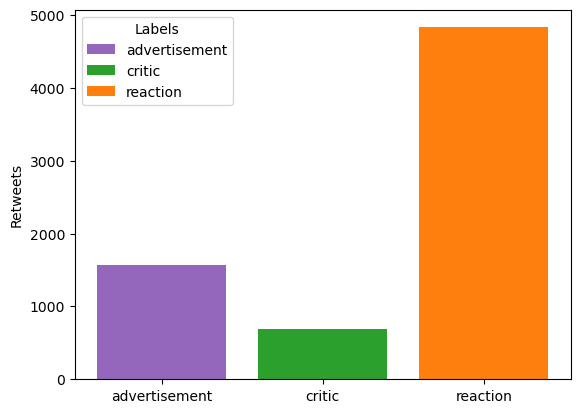

In [15]:
fig, ax = plt.subplots()

label_strs = list(labels.keys())
averages = [np.average(labels[label]) for label in labels_strs]

bar_colors = ['tab:purple', 'tab:green', 'tab:orange']

ax.bar(label_strs, averages, label=label_strs, color = bar_colors)

ax.set_ylabel('Retweets')
ax.legend(title = 'Labels')

plt.show()